First 5 rows of the dataset:
   Project_ID  Building_Height  Material_Quality_Index  Labor_Cost  \
0           1        21.854305                       9   70.213332   
1           2        47.782144                       9  142.413614   
2           3        37.939727                       3  110.539985   
3           4        31.939632                       6  250.784939   
4           5        12.020839                       7  167.575159   

   Concrete_Strength  Foundation_Depth  Weather_Index  Construction_Cost  
0          45.326394          8.804790              4        2400.287931  
1          47.900505          6.727632              6        3705.461312  
2          22.112484          8.208544              8        2653.631004  
3          26.267562          7.094515              4        2534.099466  
4          40.134306          6.160303              6        1741.179333  

Column Names in Dataset:
['Project_ID', 'Building_Height', 'Material_Quality_Index', 'Labor_Cost', 

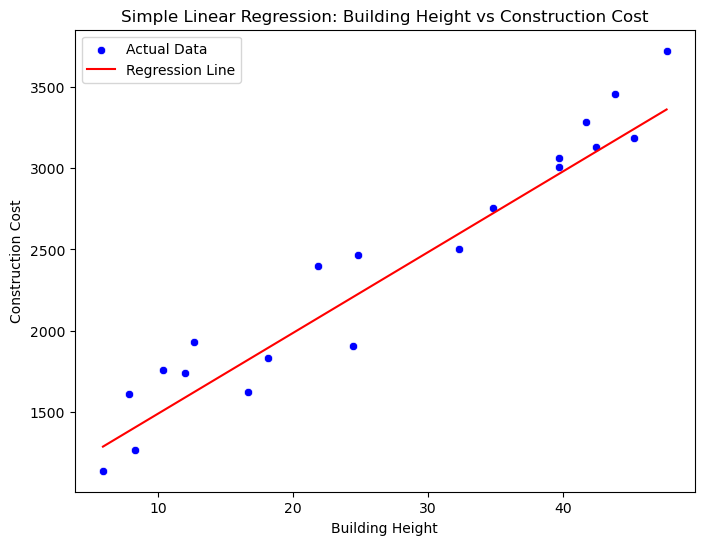

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('Civil_Engineering_Regression_Dataset.csv')


print("First 5 rows of the dataset:")
print(df.head())


print("\nColumn Names in Dataset:")
print(df.columns.tolist())


df.columns = df.columns.str.strip()


independent_var = 'Building_Height'  
dependent_var = 'Construction_Cost'  


if independent_var not in df.columns or dependent_var not in df.columns:
    print(f"\nError: One or both required columns ('{independent_var}', '{dependent_var}') not found in dataset.")
    print("Check column names and update accordingly.")
else:
    
    X = df[[independent_var]]  
    y = df[dependent_var]  


    if X.isnull().sum().any() or y.isnull().sum().any():
        print("\nHandling missing values...")
        X.fillna(X.mean(), inplace=True)  
        y.fillna(y.mean(), inplace=True)  

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = LinearRegression()
    model.fit(X_train, y_train)

    
    intercept = model.intercept_
    slope = model.coef_[0]

    
    print(f"\nRegression Equation: {dependent_var} = {intercept:.2f} + {slope:.2f} * {independent_var}")


    y_pred = model.predict(X_test)

    
    r2 = r2_score(y_test, y_pred)  
    mse = mean_squared_error(y_test, y_pred)  

    print(f"\nModel Performance:")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")

    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test[independent_var], y=y_test, color='blue', label="Actual Data")
    sns.lineplot(x=X_test[independent_var], y=y_pred, color='red', label="Regression Line")
    plt.xlabel("Building Height")
    plt.ylabel("Construction Cost")
    plt.title("Simple Linear Regression: Building Height vs Construction Cost")
    plt.legend()
    plt.show()
